In [ ]:
#Requirements.

import cv2
from collections import OrderedDict
import imutils
import numpy as np
from scipy.spatial import distance as dist

The coordinates for centroids that have been tracked on the previous 
frame of the video (format: [x-coordinate, y-coordinate]). 
 [[0.37454012 0.95071431]
 [0.73199394 0.59865848]] 



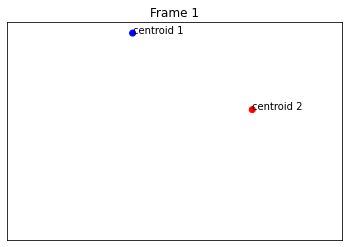


The coordinates for centroids on the current frame. 
 [[0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]] 



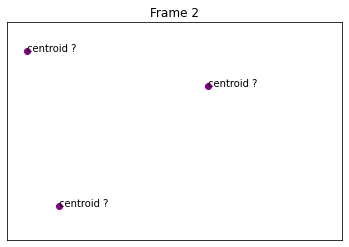


The Euclidean distances between centroids on the previous and current 
frame. Each row in this array represents a previously tracked centroid 
and each column represents a newly detected centroid on the current 
video frame. Thus, the first value in the array (row 1, column 1) is the 
distance between the first tracked object centroid and the first 
untracked object centroid. The value in (row 2, column 3) is the 
distance between the second tracked object and the third untracked 
object and so on. 
 [[0.82421549 0.32755369 0.33198071]
 [0.72642889 0.72506609 0.17058938]] 

The smallest distances to an untracked centroid for each previously 
tracked centroid. 
 [0.32755369 0.17058938] 

The indexes of the smallest distances to an untracked centroid for 
each previously tracked centroid with respect to rows in the Euclidean 
distance array. They are sorted from least to greatest distance. 
 [1 0] 

The indexes of the smallest distances to an untracked centroid for 
each previously trac

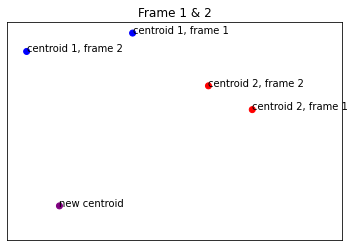

In [ ]:
#Testing concepts implemented into the centroid tracker.
#Included comments in print statements to make this cell's output 
#easier to follow!

import matplotlib.pyplot as plt

np.random.seed(42)
tracked_centroids = np.random.uniform(size=(2,2))
print("The coordinates for centroids that have been tracked on the previous \n"
      "frame of the video (format: [x-coordinate, y-coordinate]). \n",
      tracked_centroids, "\n")

plt.scatter(tracked_centroids[:,0], tracked_centroids[:,1], c=("blue", "red"))
plt.tick_params(axis="both", which="both", top=False, bottom=False, left=False, right=False, labeltop=False, labelbottom=False, labelleft=False, labelright=False)
plt.annotate("centroid 1", tracked_centroids[0])
plt.annotate("centroid 2", tracked_centroids[1])
plt.title("Frame 1")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

untracked_centroids = np.random.uniform(size=(3,2))
print("\nThe coordinates for centroids on the current frame. \n", 
      untracked_centroids, "\n")

plt.scatter(untracked_centroids[:,0], untracked_centroids[:,1], c=("purple"))
plt.tick_params(axis="both", which="both", top=False, bottom=False, left=False, right=False, labeltop=False, labelbottom=False, labelleft=False, labelright=False)
plt.annotate("centroid ?", untracked_centroids[0])
plt.annotate("centroid ?", untracked_centroids[1])
plt.annotate("centroid ?", untracked_centroids[2])
plt.title("Frame 2")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

inter_frame_distance = dist.cdist(tracked_centroids, untracked_centroids)
print("\nThe Euclidean distances between centroids on the previous and current \n"
      "frame. Each row in this array represents a previously tracked centroid \n"
      "and each column represents a newly detected centroid on the current \n"
      "video frame. Thus, the first value in the array (row 1, column 1) is the \n"
      "distance between the first tracked object centroid and the first \n"
      "untracked object centroid. The value in (row 2, column 3) is the \n"
      "distance between the second tracked object and the third untracked \n"
      "object and so on. \n", 
      inter_frame_distance, "\n")

print("The smallest distances to an untracked centroid for each previously \n"
      "tracked centroid. \n",
      inter_frame_distance.min(axis=1), "\n")

row_indexes = inter_frame_distance.min(axis=1).argsort()
print("The indexes of the smallest distances to an untracked centroid for \n"
      "each previously tracked centroid with respect to rows in the Euclidean \n"
      "distance array. They are sorted from least to greatest distance. \n",
      row_indexes, "\n")
      
column_indexes = inter_frame_distance.argmin(axis=1)[row_indexes]
print("The indexes of the smallest distances to an untracked centroid for \n"
      "each previously tracked centroid with respect to columns in the \n"
      "Euclidean distance array. They are sorted from least to greatest distance. \n"
      "In this example, the smallest distances are in the second (index 1) and \n"
      "third (index 2) columns of the Euclidean distances array. \n",
      column_indexes, "\n")

print("An array of the row and column indexes that refer to the smallest \n"
      "distances from previously tracked centroids to new centroids in the \n"
      "Euclidean distances array. These indexes are sorted from smallest to \n"
      "largest distance. In this example, index[1, 2] in the Euclidean distance \n"
      "array refers to the value in (row 2, column 3) which is the smallest \n"
      "distance in the array. The next index [0, 1] refers to the value in \n"
      "(row 1, column 2). This means that the second tracked centroid will be \n"
      "matched with and considered to be the same object as the third newly \n"
      "detected centroid, and the first tracked centroid will be matched with \n"
      "and considered the same object as the second newly detected centroid. \n"
      "The last newly detected point is left unmatched and is considered a new \n"
      "object's centroid. \n", 
      list(zip(row_indexes, column_indexes)), "\n")

plt.scatter(np.append(tracked_centroids[:,0], untracked_centroids[:,0]), np.append(tracked_centroids[:,1], untracked_centroids[:,1]), c=("blue", "red", "purple", "blue", "red"))
plt.tick_params(axis="both", which="both", top=False, bottom=False, left=False, right=False, labeltop=False, labelbottom=False, labelleft=False, labelright=False)
plt.annotate("centroid 1, frame 1", tracked_centroids[0])
plt.annotate("centroid 2, frame 1", tracked_centroids[1])
plt.annotate("new centroid", untracked_centroids[0])
plt.annotate("centroid 1, frame 2", untracked_centroids[1])
plt.annotate("centroid 2, frame 2", untracked_centroids[2])
plt.title("Frame 1 & 2")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [ ]:
#Centroid tracker that records the unique objects in a video.

class CentroidTracker():
  def __init__(self, max_time_out_of_frame = 60):
    self.max_time_out_of_frame = max_time_out_of_frame 
    #the maximum number of frames an object can be out of frame before being 
    #considered a disappeared object
    self.next_object_id = 0 
    #the next unique id of an object that is assigned once an object is 
    #considered a disappeared object
    self.objects = OrderedDict() 
    #a dictionary storing all of the object ids as keys and their respective 
    #centroid x,y coordinates as values
    self.disappeared_objects = OrderedDict() 
    #a dictionary storing object ids as keys and the number of frames they 
    #have been out of frame as values

  #add new objects and their respective centroid coordinates
  def register_new_object(self, centroid):
    self.objects[self.next_object_id] = centroid 
    #the value returned from the object dictionary key is the centroid of that
    #object
    self.disappeared_objects[self.next_object_id] = 0 
    #the number of frames an object has been out of frame starts at zero
    self.next_object_id += 1 
    #a new object id is created for when a disappeared object is eventually 
    #deregistered

  #remove objects that have been out of frame for the maximum allowed time
  def deregister_object(self, object_id):
    del self.objects[object_id]
    del self.disappeared_objects[object_id]

  #update the dictionary of tracked objects when objects are registered
  #or deregistered
  def update_objects(self, bounding_boxes):
    #if there are no objects detected, mark any previously existing objects 
    #as disappeared and increment the time they've been out of frame
    if len(bounding_boxes) == 0:
      for object_id in list(self.disappeared_objects.keys()):
        self.disappeared_objects[object_id] +=1
        
        #if the object has disappeared for the maximum number of frames, 
        #deregister the object
        if self.disappeared_objects[object_id] > self.max_time_out_of_frame:
          self.deregister_object(object_id)
      
      #finish the method early because there are no objects to update
      return self.objects
    
    #for all the detected bounding boxes (i.e. objects), find their centroids 
    #and register them
    current_frame_centroids = np.zeros((len(bounding_boxes), 2), dtype="int")
    for (i, (start_x_coord, start_y_coord, end_x_coord, end_y_coord)) in enumerate(bounding_boxes):
      x_coordinate = int((start_x_coord + end_y_coord) /2.0)
      y_coordinate = int((start_y_coord + end_x_coord) /2.0)
      current_frame_centroids[i] = (x_coordinate, y_coordinate)

      if len(self.objects) == 0:
        for i in range(0, len(current_frame_centroids)):
          self.register(current_frame_centroids[i])

      #match a centroid from a previous frame to a centroid on the current 
      #frame by minimizing the Euclidean distance between them
      else:
        object_ids = list(self.objects.keys())
        object_centroids = list(self.objects.values())
        inter_frame_distance = dist.cdist(np.array(object_centroids), current_frame_centroids)
        row_indexes = inter_frame_distance.min(axis=1).argsort()
        column_indexes = inter_frame_distance.argmin(axis=1)[row_indexes]
        
        #find centroids on the current frame that have the smallest distance to
        #a centroid on the previous frame and have not yet been matched with a 
        #centroid from the previous frame
        searched_rows = set()
        searched_columns = set()
        for (row, column) in zip(row_indexes, column_indexes):
          if row in searched_rows | column in searched_columns:
            continue
          object_id = object_ids[row]
          self.objects[object_id] = current_frame_centroids[column]
          self.disappeared_objects[object_id] = 0
          searched_rows.add(row)
          searched_columns.add(column)

        #dealing with objects that have been lost or disappeared
        unsearched_rows = set(range(0, inter_frame_distance.shape[0])).difference(searched_rows)
        unsearched_columns = set(range(0, inter_frame_distance.shape[1])).difference(searched_columns)
        if inter_frame_distance.shape[0] >= inter_frame_distance.shape[1]:
          for row in unsearched_rows:
            object_id = object_ids[row]
            self.disappeared_objects[object_id] += 1
            if self.disappeared_objects[object_id] > self.max_time_out_of_frame:
              self.deregister_object[object_id]
            else:
              for column in unsearched_columns:
                self.register_new_object(current_frame_centroids[column])
        
        #return the updateddictionary of trackable objects for current 
        #video frame
        return self.objects
